<a href="https://colab.research.google.com/github/glukonatic/mystudy/blob/master/III_PRO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1
## студента Университета искусственного интеллекта
## Наговицына Антона Михайловича
### Поток PRO НС - апрель 2020 (основной тариф).
![alt Nagovitsyn_Anton](https://proza.ru/photos/glukonatic.jpg)

# Light. Вариант 1




---


Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
1.   Импорт библиотек.
2.   Загрузка базы mnist.
3.   Нормирование и преобразование x_train и y_train.
4.   Создание нейронной сети.
5.   Обучение нейронной сети.

Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.


---



In [0]:
#@title 1. Импорт библиотек (и определение глобальных переменных и функций, необходимых для экспериментов)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab as pl
import pandas as pd
import collections
import math
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline


#@markdown Для построения модели можно указать число нейронов для входного (defNeyronsInput) и скрытого (defNeyronsHidden) слоёв. Для обучения - указать величину выборок defBatchSize, количество эпох defEpochs, параметром defVerbose можно установить отображение процесса обучения, и, наконец, можно изменить функцию активации, применяемую по умолчанию в слоях. Эти параметры - глобальные для всех блоков.

#defNeyronsInput = 320 #@param {type:"slider", min:0, max:1000, step:16}
#defNeyronsHidden = 320 #@param {type:"slider", min:16, max:1000, step:16}
#defBatchSize = 128 #@param {type:"slider", min:128, max:1024, step:128}
#defEpochs = 15 #@param {type:"slider", min:1, max:20}
#defVerbose = 0  #@param {type: "slider", min: 0, max: 1}

defNeyronsInput = 320 #@param [160, 320, 480, 640, 800, 960] {allow-input: true}
defNeyronsHidden = 320 #@param [160, 320, 480, 640, 800, 960] {allow-input: true}
defBatchSize = 128 #@param [64, 128, 256, 512, 1024, 2048, 4096] {allow-input: true}
defEpochs = 15 #@param [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15] {allow-input: true}
defVerbose = 0 #@param [0, 1] {allow-input: false}
defActivation = 'relu'  #@param ['relu', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']

#@markdown ---


# Определим глобальные функции для дальнейших экспериментов

# Функция, выполняющая построение нейронной сети на основании переданных параметров-аргументов
def runFit(numOfNeyronsInput=defNeyronsInput,numOfNeyronsHidden=defNeyronsHidden,
           batchSize=defBatchSize,epochs=defEpochs,verbose=defVerbose,
           activation=defActivation):
  '''
    Функция runFit, создающая модель, как на занятии, но с меньшим числом нейронов, 
    с определенным количеством нейронов в скрытом слое.
    На вход принимает значения:
    numOfNeyronsInput - целочисленное значение, число нейронов во входном слое;
    numOfNeyronsHidden - целочисленное значение, число нейронов в скрытом слое;
    batchSize - размер "пачки" примеров для обучения модели;
    epochs - количество эпох для обучения модели;
    verbose - флаг для вывода информации о компиляции модели, 0 или 1;
    activation - активационная функция в одном из скрытых слоёв (во втором).
    По умолчанию функция принимает дефолтные значения аргументов.
    Функция возвращает объект history созданной модели.
  '''
  model = Sequential()
  print('Новая пустая модель нейронной сети создана')
  model.add(Dense(numOfNeyronsInput, input_dim=784, activation=activation))
  print('Добавлен входной слой с количеством нейронов, равным ',numOfNeyronsInput,' и функцией активации ' + activation)
  if numOfNeyronsHidden > 0 :
    model.add(Dense(numOfNeyronsHidden, activation=activation))
    print('Добавлен скрытый слой с количеством нейронов, равным ',numOfNeyronsHidden, ' и функцией активации ' + activation)
  model.add(Dense(10, activation="softmax"))
  print('Добавлен выходной слой, модель компилируется...')
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  print('Модель скомпилирована, её характеристики:')
  model.summary()
  print('Выполняется обучение модели, длиной в ' + str(epochs) + ' эпох и с числом обучающих примеров, равным ' + str(batchSize) + ', пожалуйста, подождите...')
  return model.fit(x_train, y_train, batch_size=batchSize, epochs=epochs, verbose=verbose)




# Функция, рисующая графики на основании полученных данных в экспериментах
def runPlot(paramDict,experimentName):
  '''
    Функция runPlot, отрисовывающая графики по полученным в экспериментах данным
    На вход принимает значения:
    paramDict - словарь полученных в результате экспериментов данных
    experimentName - определяет, какой эксперимент был проведён
    Функция ничего не возвращает
  '''

  # Инициализируем графики, их у нас всегда по два - для точности и для потерь
  f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))

  # Сформируем кастомные заголовки для графиков
  labels = []

  # Перебираем словарь результатов экспериментов
  for key, value in paramDict.items():
    if experimentName == 'custom_neyrons':
      labels.append(str(key) + ' нейронов')
      f.suptitle('Графики для сравнения зависимости точности модели от числа нейронов')
    if experimentName == 'custom_activation':
      labels.append('Активационная функция ' + key)
      f.suptitle('Графики для сравнения зависимости точности модели от выбранной активационной функции в сравнении с \'relu\'')
    if experimentName == 'custom_batchsize':
      labels.append('batch_size = ' + str(key))
      f.suptitle('Графики для сравнения зависимости точности модели от batch_size')
    ax1.plot(value.history['loss'])
    ax2.plot(value.history['accuracy'])

  # Разметим графики подписями осей, заголовками и легендой
  ax1.set_title('Потери моделей')
  ax1.set_ylabel('Потери')
  ax1.set_xlabel('Эпохи')
  ax1.grid(color='g', linestyle=':', linewidth=1)
  ax1.legend(labels, loc='upper right')
  ax2.set_title('Точность моделей')
  ax2.set_ylabel('Точность')
  ax2.set_xlabel('Эпохи')
  ax2.grid(color='g', linestyle=':', linewidth=1)
  ax2.legend(labels, loc='lower right')




# Функция, помогающая устранить шумы на загруженном изображении (повысить контрастность)
def contrastingImage(img, coeff):
  '''
  Функция для повышения контрастности картинки.
  На вход принимает:
  img - файл картинки,
  coeff - коэффициент контраста, больше либо равен 1.
  На выходе - массив строки пикселей картинки
  '''

  result = []
  # Определим avg - среднюю "светимость" пикселя на загруженной картинке
  avg = np.mean(image.img_to_array(img))
  # Пройдемся по каждому пикселю картинки в двумерном цикле
  for x in range(img.size[0]):
    for y in range(img.size[1]):
      # Получим яркость текущего пикселя
      g = img.getpixel((y, x))
      # Нормируем его, применяя аналог функции активации "гиперболический тангенс" tanh
      # и добавляем в список отнормированный пиксель
      result.append((math.tanh((g - avg + coeff*2.5))+1)*127)
      
  return result




# Словари для сохранения истории экспериментов
historyNeyrons = collections.defaultdict()
historyBatchSize = collections.defaultdict()
historyActivation = collections.defaultdict()

In [0]:
#@title 2. Загрузка базы mnist

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [0]:
#@title 3. Нормирование и преобразование x_train и y_train

x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [9]:
#@title 4-5. Создание нейронной сети и её обучение

# Создание модели
model = Sequential()
model.add(Dense(defNeyronsInput, input_dim=784, activation=defActivation))
if defNeyronsHidden > 0 :
  model.add(Dense(defNeyronsHidden, activation=defActivation))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# Обучение модели
model.fit(x_train, y_train, batch_size=defBatchSize, epochs=defEpochs, verbose=defVerbose)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 320)               251200    
_________________________________________________________________
dense_7 (Dense)              (None, 320)               102720    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________


# Light. Вариант 2



---


Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
1.   Поменяйте количество нейронов в сети, используя следующие значения:
  *   один слой 10 нейронов
  *   один слой 100 нейронов
  *   один слой 5000 нейронов
2.   Поменяйте активационную функцию в скрытых слоях с relu на linear.
3.   Поменяйте размеры batch_size:
  *   1
  *   10
  *   100
  *   Вся база (60000)
4.   Запишите в таблицу получившиеся точности.
5.   Напишите выводы по результатам проведенных тестов.


---



Добавлен входной слой с количеством нейронов, равным  320
Добавлен скрытый слой с количеством нейронов, равным  10
Добавлен выходной слой, модель компилируется...
Модель скомпилирована, её характеристики:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 320)               251200    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3210      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 254,520
Trainable params: 254,520
Non-trainable params: 0
_________________________________________________________________
Запускается обучение модели...
Добавлен входной слой с количеством нейронов, равным  320
Добавлен скрытый слой с количеством нейронов, равным  100
Добавлен выходной слой, мо

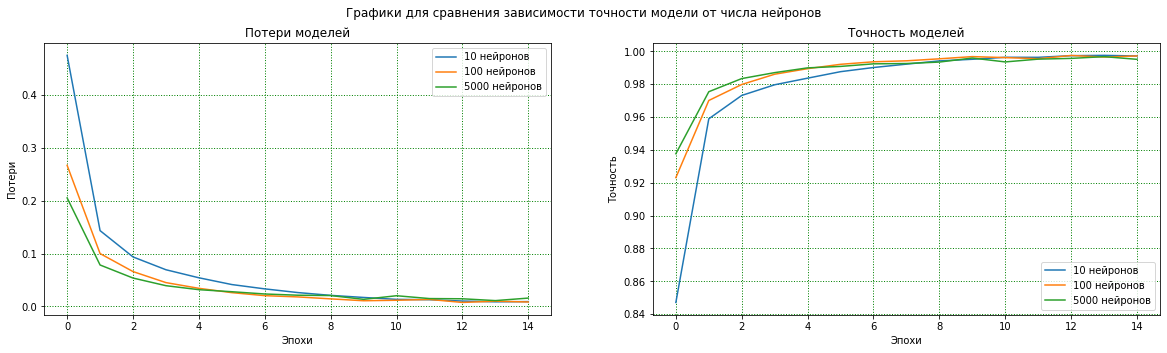

In [0]:
#@title 1. Поменяйте количество нейронов в сети.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию - 10, 100, 5000 нейронов.

neyronsModel1 = 10  #@param {type: "number"}
neyronsModel2 = 100  #@param {type: "number"}
neyronsModel3 = 5000  #@param {type: "number"}

#@markdown ---

# Запустим три модели с указанным числом нейронов в каждой
historyNeyrons[neyronsModel1] = runFit(numOfNeyronsHidden=neyronsModel1)
historyNeyrons[neyronsModel2] = runFit(numOfNeyronsHidden=neyronsModel2)
historyNeyrons[neyronsModel3] = runFit(numOfNeyronsHidden=neyronsModel3)

# Запустим функцию построения графиков
runPlot(historyNeyrons,'custom_neyrons')

Добавлен входной слой с количеством нейронов, равным  320
Добавлен скрытый слой с количеством нейронов, равным  320
Добавлен выходной слой, модель компилируется...
Модель скомпилирована, её характеристики:
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_16 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________
Запускается обучение модели...
Добавлен входной слой с количеством нейронов, равным  320
Добавлен скрытый слой с количеством нейронов, равным  320
Добавлен выходной слой, м

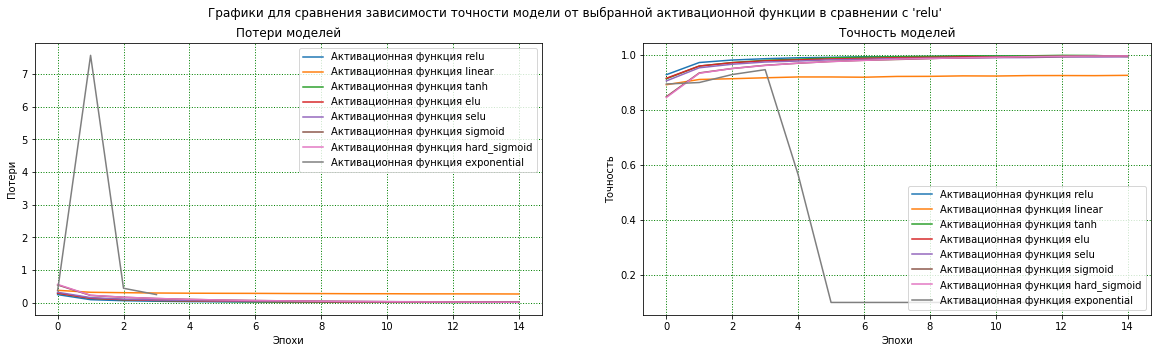

In [0]:
#@title 2. Поменяйте активационную функцию в скрытых слоях (у нас он один) с relu на linear.
#@markdown Ниже можно изменить активационную функцию (не 'relu') для сравнения с работой функции активации по умолчанию ('relu'). В целях проверить работу нескольких функций активаций добавлена возможность построения модели с ними, но можно указать 'none', чтобы не проводить дополнительные эксперименты.

customActivation1 = "linear"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation2 = "tanh"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation3 = "elu"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation4 = "selu"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation5 = "sigmoid"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation6 = "hard_sigmoid"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
customActivation7 = "exponential"  #@param ['none', 'linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']

#@markdown ---

# Запустим модели с указанной активационной функцией
historyActivation[defActivation] = runFit()
historyActivation[customActivation1] = runFit(activation=customActivation1)
if customActivation2 != 'none':
  historyActivation[customActivation2] = runFit(activation=customActivation2)
if customActivation3 != 'none':
  historyActivation[customActivation3] = runFit(activation=customActivation3)
if customActivation4 != 'none':
  historyActivation[customActivation4] = runFit(activation=customActivation4)
if customActivation5 != 'none':
  historyActivation[customActivation5] = runFit(activation=customActivation5)
if customActivation6 != 'none':
  historyActivation[customActivation6] = runFit(activation=customActivation6)
if customActivation7 != 'none':
  historyActivation[customActivation7] = runFit(activation=customActivation7)

# Запустим функцию построения графиков
runPlot(historyActivation,'custom_activation')

In [0]:
#@title 3. Поменяйте размеры batch_size.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию: 1, 10, 100, 60000. Внимание! При batch_size < 50 возможно длительное ожидание завершения работы блока.

batchModel1 = 1  #@param {type: "number"}
batchModel2 = 10  #@param {type: "number"}
batchModel3 = 100  #@param {type: "number"}
batchModel4 = 60000  #@param {type: "number"}

#@markdown ---

# Запустим четыре модели с указанным числом batch_size в каждой
historyBatchSize[batchModel1] = runFit(batchSize=batchModel1)
historyBatchSize[batchModel2] = runFit(batchSize=batchModel2)
historyBatchSize[batchModel3] = runFit(batchSize=batchModel3)
historyBatchSize[batchModel4] = runFit(batchSize=batchModel4)

# Запустим функцию построения графиков
runPlot(historyBatchSize,'custom_batchsize')

Добавлен входной слой с количеством нейронов, равным  320
Добавлен скрытый слой с количеством нейронов, равным  320
Добавлен выходной слой, модель компилируется...
Модель скомпилирована, её характеристики:
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_40 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________
Запускается обучение модели...


4. Запишите в таблицу получившиеся точности.

In [0]:
#@title 4.1 Таблица экспериментов, зависимость точности от числа нейронов.

neyronsAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyNeyrons.items():
  neyronsAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - число нейронов в скрытом слое')
neyronsAccuracyData

In [0]:
#@title 4.2 Таблица экспериментов, зависимость точности от активационной функции.

activationAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyActivation.items():
  activationAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - название активационной функции')
activationAccuracyData

In [0]:
#@title 4.3 Таблица экспериментов с изменением batch_size.

batchSizeAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyBatchSize.items():
  batchSizeAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - размер batch_size')
batchSizeAccuracyData

5. Напишите выводы по результатам проведенных тестов.

Выводы:

1. При увеличении числа нейронов в скрытом слое точность предсказания НС повышается. При этом есть некое значение числа нейронов, выше которого точность либо повышается совсем незначительно, либо не повышается вовсе, при этом временные затраты на обучение нейронной сети сильно повышаются.
2. При уменьшении batch_size увеличивается точность предсказания НС. При совсем малых значениях может потребоваться много ресурсов для обучения модели НС (либо время, либо аппаратные мощности). При больших значениях выборок требуется большое количество эпох.
3. Активационная функция relu показала себя лучше, чем другие проверенные АФ (linear, tanh, elu, selu, sigmoid, hard_sigmoid, exponential). При этом функция exponential довольно странно себя показала. Требуется дополнительное исследование отдельно по ней.
4. Если сделать число эпох большим, то модель НС может переобучиться.

# Pro



---


Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).
Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).


---




In [0]:
#@title 1-2. В графическом редакторе рисуем произвольную цифру. Сохраняем документ и загружаем его в Collaboratory.

uploadedFile = files.upload()

In [0]:
#@title 3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.

for key in uploadedFile.keys():
  filename = key
img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')
img

In [0]:
#@title 4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.

imageArray = image.img_to_array(img).reshape(28,28)
plt.imshow(Image.fromarray(imageArray).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
print('Отрисуем массив, полученный из файла загруженой цифры, на экран')
plt.show()

In [0]:
#@title 5. Выполняем инверсию цветов, нормирование и решейп массива.

# Инверсия цветов
imageArray = 255 - imageArray
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
print('Отрисуем инвертированную картинку на экран')
plt.show()

# Решейп
imageArrayReshape = imageArray.reshape(784,)
print('Размерность массива до решейпа',imageArrayReshape.shape)
imageArrayReshape = np.expand_dims(imageArrayReshape, axis=0)
print('Размерность массива после решейпа',imageArrayReshape.shape)

# Нормирование
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255


In [0]:
#@title 6. Выполняем распознавание собственной рукописной цифры (используется модель, построенная на шаге 3).

prediction = model.predict(imageArrayReshape)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)

In [29]:
#@title Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения). Необходимо загрузить файл (при запуске ячейки отобразится панель загрузки).

uploadedFile = files.upload()

for key in uploadedFile.keys():
  filename = key
img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')

Saving 2.jpg to 2 (16).jpg


Отрисуем загруженую цифру на экран


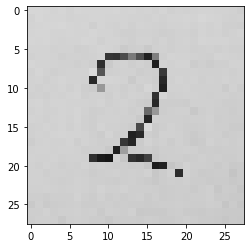

Отрисуем контрастированную картинку на экран


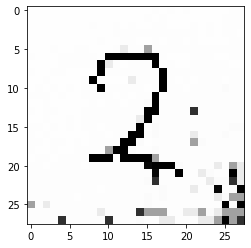

Отрисуем инвертированную картинку на экран


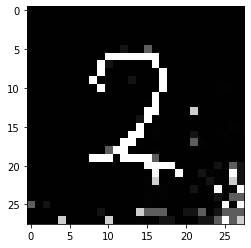

Выходной вектор результата распознавания: [[2.3468993e-09 5.0509918e-08 9.9946207e-01 5.1833753e-04 1.1018004e-17
  1.4831263e-10 9.8647056e-11 1.7929331e-05 1.6840293e-06 3.7256395e-08]]
Модель распознала цифру: 2


In [38]:
#@title Здесь нам потребуется поработать с контрастностью картинки. Для этого вводится коэффициент контрастности contrastCoeff (лучшее значение подбирается опытным путём). Используется модель, построенная на шаге 3.

contrastCoeff = 0 #@param {type:"slider", min:0, max:100, step:1}



print('Отрисуем загруженую цифру на экран')
imageArray = image.img_to_array(img).reshape(28,28)
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Отконтрастируем картинку
contrastedImgArr = contrastingImage(img, contrastCoeff)

# Преобразуем полученный одномерный массив в двумерный
imageArray = np.asarray(contrastedImgArr).reshape(28,28)
print('Отрисуем контрастированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Инверсия цветов
imageArray = 255 - imageArray
print('Отрисуем инвертированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Сделаем решейп
imageArray = imageArray.reshape(784,)
imageArray = np.expand_dims(imageArray, axis=0)

# Нормируем
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255

# Распознаём
prediction = model.predict(imageArray)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)

In [0]:
#@title Зачистка папки виртуального окружения от загруженных картинок формата jpeg, png и jpg.

!rm *.jpeg *.png *.jpg
!ls